In [152]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [153]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [154]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [155]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
startDate=dt.date(2017, 6, 1)
endDate=startDate + dt.timedelta(days=29)
print(startDate," ",endDate)
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= startDate,Measurement.date <= endDate)

#  3. Convert the June temperatures to a list.
juneTemps=results.all()

# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Daily Temps'])
june_df=df
display(df)

# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
juneSummaryStats=df.describe()
print(juneSummaryStats)

2017-06-01   2017-06-30


,date,June Daily Temps
0,2017-06-01,79.0
1,2017-06-02,79.0
2,2017-06-03,79.0
3,2017-06-04,79.0
4,2017-06-05,80.0
...,...,...
186,2017-06-26,79.0
187,2017-06-27,74.0
188,2017-06-28,74.0
189,2017-06-29,76.0


       June Daily Temps
count        191.000000
mean          77.219895
std            2.622538
min           71.000000
25%           75.000000
50%           77.000000
75%           79.000000
max           83.000000


## D2: Determine the Summary Statistics for December

In [156]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
startDate=dt.date(2016, 12, 1)
endDate=startDate + dt.timedelta(days=30)
print(startDate," ",endDate)
decResults = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= startDate,Measurement.date <= endDate)

# 7. Convert the December temperatures to a list.
decResults=decResults.all()

# 8. Create a DataFrame from the list of temperatures for the month of December. 
df=pd.DataFrame(decResults, columns=['date','Dec Daily Temps'])
dec_df=df

# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decSummaryStats=df.describe()
print(decSummaryStats)

2016-12-01   2016-12-31
       Dec Daily Temps
count       200.000000
mean         71.130000
std           3.419292
min          60.000000
25%          69.000000
50%          71.000000
75%          74.000000
max          78.000000


## Plots

<ipython-input-158-52df988259da>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['June', 'Dec'])


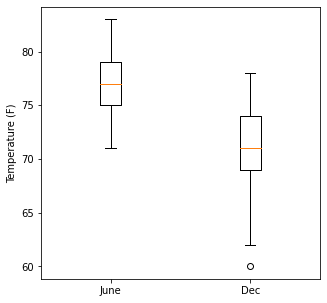

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt

#data_dic={'June':june_df['June Daily Temp'],\
#    'Dec':dec_df['Dec Daily Temps']}

june_data=june_df['June Daily Temps']
dec_data=dec_df['Dec Daily Temps']

fig = plt.figure(figsize =(5, 5)) 
ax = fig.add_subplot(111) 

ax.set_xticklabels(['June', 'Dec'])
ax.set_ylabel('Temperature (F)')
bp=ax.boxplot([june_data,dec_data])

plt.show(bp)

In [ ]:
juneSummaryStats

,June Daily Temp
count,191.000000
mean,77.219895
std,2.622538
min,71.000000
25%,75.000000
50%,77.000000
75%,79.000000
max,83.000000


## Create Monthly Table

In [181]:
# Combine Dataframes
combine_df=round(juneSummaryStats,1)
combine_df['Dec Daily Temps']=round(decSummaryStats,1)
combine_df.drop("count")

display(combine_df)

,June Daily Temps,Dec Daily Temps
count,191.0,200.0
mean,77.2,71.1
std,2.6,3.4
min,71.0,60.0
25%,75.0,69.0
50%,77.0,71.0
75%,79.0,74.0
max,83.0,78.0
